In [1]:
from pathlib import Path

import skimage
from skimage import io
from skimage.transform import resize
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.filters import laplace
%matplotlib inline

In [14]:
def laplace_multiplicand(fileID, band):
    fires = io.imread(fileID);
    original = np.squeeze(fires[:,:,0])
    height, width = original.shape
    
    smallFires = resize(original, (round(height/2), round(width/2)), order=3)*255
    #blurryFires = resize(smallFires, (height, width)) 
    
    #details = firstChannel - blurryFires
    laplace_edges = laplace(smallFires)
    
    table = []
    amount = 0
    while amount <= 1:
        sharped_image = smallFires + laplace_edges * amount
        fake_image = resize(sharped_image, (height, width))
        abs_error = abs(original - fake_image)
        mean = abs_error.mean()
        sqrt = np.sqrt(((original - fake_image)**2).mean())
        table.append({'Filename': fileID,'Band': band,'Multiplicand': amount, 'Mean Error': mean, 'Square Root': sqrt})
        amount = amount + .1
    
    return pd.DataFrame(table)

In [15]:
laplace_multiplicand('GOES.png','07')

,Filename,Band,Multiplicand,Mean Error,Square Root
0,GOES.png,07,0.0,1.614732,2.507589
1,GOES.png,07,0.1,1.517671,2.298329
2,GOES.png,07,0.2,1.514155,2.267324
3,GOES.png,07,0.3,1.597552,2.421431
4,GOES.png,07,0.4,1.746971,2.729474
5,GOES.png,07,0.5,1.942833,3.146562
6,GOES.png,07,0.6,2.171900,3.635356
7,GOES.png,07,0.7,2.424378,4.170719
8,GOES.png,07,0.8,2.693436,4.736888
9,GOES.png,07,0.9,2.974590,5.324045


In [89]:
# creates a table out of all the c14 files
dfc14 = pd.concat((laplace_multiplicand(file, '14') for file in Path('TIFF_Files/CampFire/').glob('GOES-17_ABI_RadC_C14*')))

In [90]:
#creates a table out of all the c07 files
dfc07 = pd.concat((laplace_multiplicand(file, '07') for file in Path('TIFF_Files/CampFire/').glob('GOES-17_ABI_RadC_C07*')))

In [91]:
df_all = pd.concat([dfc14, dfc07])

In [95]:
df_all

,Filename,Band,Multiplicand,Mean Error,Square Root
0,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.0,1.993900,2.937043
1,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.1,1.934093,2.832672
2,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.2,1.883747,2.745723
3,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.3,1.844548,2.677895
4,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.4,1.817810,2.630667
...,...,...,...,...,...
6,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.6,1.414960,1.872903
7,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.7,1.417593,1.872865
8,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.8,1.428059,1.885348
9,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.9,1.445897,1.910108


Text(0.5, 1.0, 'Mean Error')

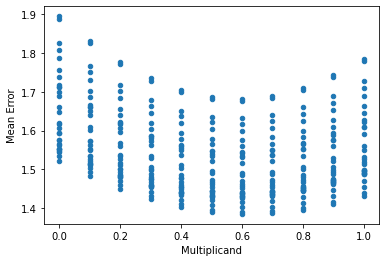

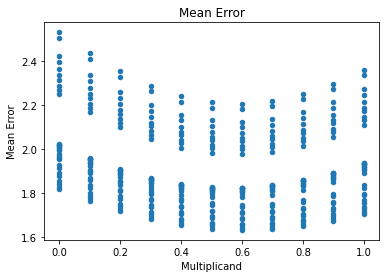

In [140]:
#extra scatterplot
df = df_all
df.groupby('Band').plot.scatter('Multiplicand','Mean Error')
#plt.legend(['Band 7', 'Band 14'], frameon = False, )
plt.title('Mean Error')

In [150]:
#ignore
df.groupby('Band').min()

,Multiplicand,Mean Error,Square Root
Band,,,
07,0.0,1.385556,1.800776
14,0.0,1.631077,2.284384


In [147]:
#ignore
df.groupby('Filename').min()

,Band,Multiplicand,Mean Error,Square Root
Filename,,,,
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_170218_cali.tif,07,0.0,1.531609,2.088781
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_171218_cali.tif,07,0.0,1.542998,2.112727
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_172218_cali.tif,07,0.0,1.544466,2.112583
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_173218_cali.tif,07,0.0,1.560063,2.133605
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_174218_cali.tif,07,0.0,1.575545,2.161295
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_175218_cali.tif,07,0.0,1.600057,2.206434
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_180218_cali.tif,07,0.0,1.616997,2.226605
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_181218_cali.tif,07,0.0,1.632594,2.262350
TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_183218_cali.tif,07,0.0,1.681729,2.337601


Band
07    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

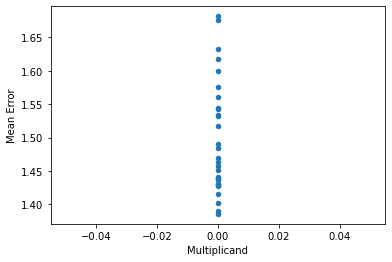

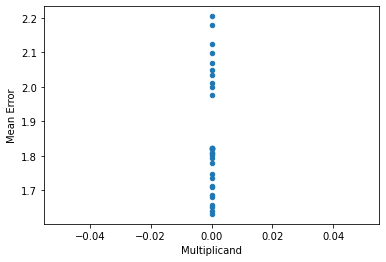

In [146]:
#scatterplot that was wrong :)
df = df_file_min
df.groupby('Band').plot.scatter('Multiplicand','Mean Error')

In [173]:
#the correct dataframe!!
df.groupby(['Band', 'Multiplicand']).mean()


Mean Error  Square Root
Band Multiplicand                         
07   0.0             1.654863     2.291633
     0.1             1.608058     2.214689
     0.2             1.568417     2.149217
     0.3             1.536881     2.096297
     0.4             1.514199     2.056904
     0.5             1.500714     2.031828
     0.6             1.496526     2.021605
     0.7             1.501503     2.026458
     0.8             1.515250     2.046277
     0.9             1.537186     2.080628
     1.0             1.566663     2.128802
14   0.0             2.084102     3.124729
     0.1             2.015986     3.007624
     0.2             1.958211     2.908415
     0.3             1.912421     2.828989
     0.4             1.879779     2.771051
     0.5             1.861005     2.735965
     0.6             1.856303     2.724614
     0.7             1.865343     2.737290
     0.8             1.887370     2.773658
     0.9             1.921375     2.832801
     1.0             1.966375     2.913327

In [176]:
df.groupby(['Band', 'Multiplicand']).mean().plot('Multiplicand','Mean Error')

KeyError: 'Multiplicand'